<a href="https://colab.research.google.com/github/Lailaehab/QRcode-preprocessing-decoding-project/blob/main/FinalQrDecoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [350]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
!pip install --upgrade reedsolo
import reedsolo as rs

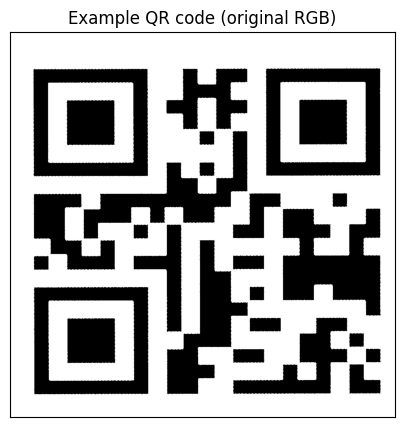

In [378]:
img = cv2.cvtColor(cv2.imread("/content/6edited (1).jpg"), cv2.COLOR_RGB2BGR)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code (original RGB)')
plt.imshow(img, cmap='gray');

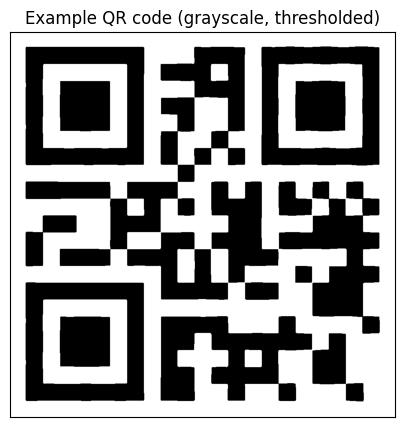

In [352]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
_, img3 = cv2.threshold(img, 142, 255, cv2.THRESH_BINARY)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.title('Example QR code (grayscale, thresholded)')
# resized_image = cv2.resize(img, (21, 21))
plt.imshow(img, cmap='gray');

0 932 3 933
Width: 930
Height: 932
difference between height and width 2
min side 930
Size of QR code: 932
grid_cell_size :  44
(924, 924)
Width: 932
Height: 932


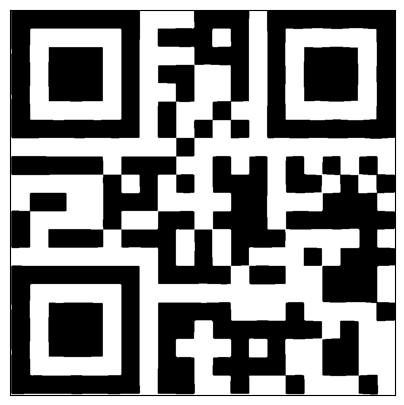

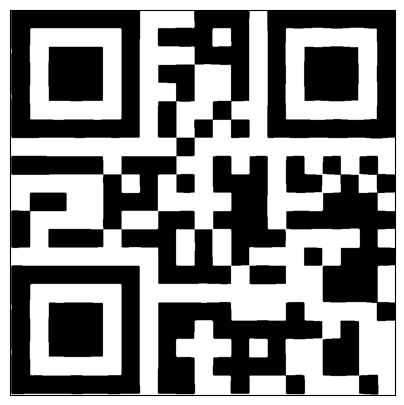

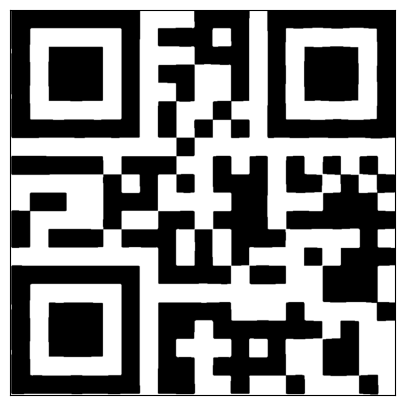

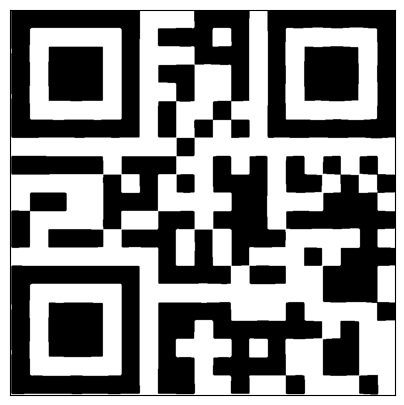

In [365]:
start_row = -1
start_col = -1
end_row = -1
end_col = -1

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3, cmap='gray');
for row_index, row in enumerate(img3):
    for pixel in row:
        if pixel != 255:
            start_row = row_index
            break
    if start_row != -1:
        break

for row_index, row in enumerate(img3[::-1]):
    for pixel in row:
        if pixel != 255:
            end_row = img3.shape[0] - row_index
            break
    if end_row != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)):
    for pixel in col:
        if pixel != 255:
            start_col = col_index
            break
    if start_col != -1:
        break

for col_index, col in enumerate(cv2.transpose(img3)[::-1]):
    for pixel in col:
        if pixel != 255:
            end_col = img3.shape[1] - col_index
            break
    if end_col != -1:
        break

img3_no_quiet_zone = img3[start_row:end_row, start_col:end_col]

print(start_row, end_row, start_col, end_col)


width = end_col - start_col
height = end_row - start_row

# Print the size of each side
print("Width:", width)
print("Height:", height)
diff= abs(width - height)
print("difference between height and width",diff)
row=min(width , height)
print('min side' , row)

# if(diff<20):

if (width < height):
  start_col=start_col - diff
else:
  start_row=start_row - diff



fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
img3=img3[start_col:end_col, start_row:end_row]
plt.imshow(img3, cmap= 'gray');


width = end_col - start_col
height = end_row - start_row

# Calculate the maximum size from the four sides
size = max(width,height)
print("Size of QR code:", size)


grid_cell_size = round(size/21)
# grid_cell_size=1
print('grid_cell_size : ',grid_cell_size)


grid_cells_num =21


desired_dim = grid_cells_num * grid_cell_size



# Alternative method to get the grid directly
# I directly resize it to 21x21 and use something like the replacement downscaling geometric transformation
# So for each collection of pixels, only one pixel survives, and since this is a perfect test case, it works
# In non-perfect test cases, you'd have needed to do some more steps to ensure correct replacement is done
img3_21x21_grid = cv2.resize(img3, (desired_dim, desired_dim), interpolation=cv2.INTER_AREA)
fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3_21x21_grid, cmap='gray');
_, img3_21x21_grid = cv2.threshold(img3_21x21_grid, 80, 255, cv2.THRESH_BINARY);
# _, qr_no_quiet_zone = cv2.threshold(img3_21x21_grid, 105, 255, cv2.THRESH_BINARY);

fig = plt.figure(figsize=(5, 5));
plt.xticks([], []);
plt.yticks([], []);
plt.imshow(img3_21x21_grid, cmap='gray');
print(img3_21x21_grid.shape)

# Print the size of each side
print("Width:", width)
print("Height:", height)


In [367]:
qr_no_quiet_zone=img3_21x21_grid

In [368]:
qr_cells = qr_no_quiet_zone.reshape((
    grid_cells_num,
    grid_cell_size,
    grid_cells_num,
    grid_cell_size,
)).swapaxes(1, 2)
print(qr_cells.shape)

(21, 21, 44, 44)


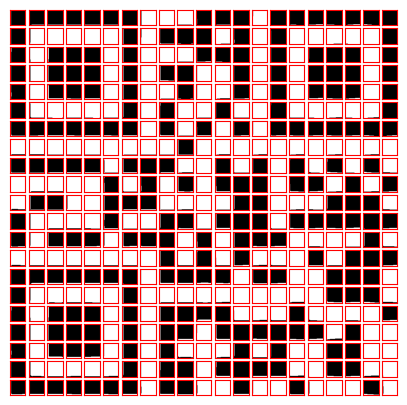

In [369]:
_, axes = plt.subplots(grid_cells_num, grid_cells_num, figsize=(5, 5))
for i, row in enumerate(axes):
    for j, col in enumerate(row):
        col.imshow(qr_cells[i][j], cmap="gray", vmin=0, vmax=255)
        col.get_xaxis().set_visible(False)
        col.get_yaxis().set_visible(False)
        col.spines[:].set_color('red')

In [370]:
qr_cells_numeric = np.ndarray((grid_cells_num, grid_cells_num), dtype=np.uint8)
for i, row in enumerate(qr_cells):
    for j, cell in enumerate(row):
        qr_cells_numeric[i, j] = (np.median(cell) // 255)

print(qr_cells_numeric)

[[0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0]
 [0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 1 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 1 0]
 [0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 0 1]
 [1 1 1 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1 0 1 0]
 [1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1]
 [0 1 1 1 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1]
 [0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 1 0]
 [0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1]
 [0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 1]
 [0 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1]
 [0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1]]


In [371]:
# We want row #8
row=np.flip(qr_cells_numeric[:, 8])

In [372]:
# The first two bits determine the error correction level
# Level L (Low)         [11]	7%  of data bytes can be restored.
# Level M (Medium)      [10]	15% of data bytes can be restored.
# Level Q (Quartile)    [01]	25% of data bytes can be restored.
# Level H (High)        [00]	30% of data bytes can be restored.
ecl = [int(not(c)) for c in row[ 0:2]]
# Why "not"? Because the standard uses '1's for black and '0's for white
#
# "A dark module is a binary one and a light module is a binary zero."
#  - ISO/IEC 18004:2000(E)
#
# In image processing, we use them the other way.. Hence the inversion
print(ecl)

[1, 1]


In [373]:
# Dictionary of all masks and their equivalent formulae
MASKS = {
    "000": lambda i, j: (i * j) % 2 + (i * j) % 3 == 0,
    "001": lambda i, j: (i // 2 + j // 3) % 2 == 0,
    "010": lambda i, j: ((i + j) % 2 + (i * j) % 3) % 2 == 0,
    "011": lambda i, j: ((i * j) % 2 + (i * j) % 3) % 2 == 0,
    "100": lambda i, j: i % 2 == 0,
    "101": lambda i, j: (i + j) % 2 == 0,
    "110": lambda i, j: (i + j) % 3 == 0,
    "111": lambda i, j: j % 3 == 0,
}

# Same row as above, the three cells after the ecl cells (converted to a string)
mask = [int(not(c)) for c in row[ 2:5]]
mask_str = ''.join([str(c) for c in mask])
print(mask_str)


111


In [374]:
UP8, UP4, DOWN8, DOWN4, CW8, CCW8 = range(6)
# A more general apply_mask function (still works the same way)
def apply_mask_general(data_start_i, data_start_j, data, mask, direction):
    result = []
    row_offsets = []
    col_offsets = []
    mask_str = ''.join([str(c) for c in mask])
    if (direction in [UP8, UP4]):
        row_offsets = [0,  0, -1, -1, -2, -2, -3, -3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction in [DOWN8, DOWN4]):
        row_offsets = [0,  0,  1,  1,  2,  2,  3,  3]
        col_offsets = [0, -1,  0, -1,  0, -1,  0, -1]
    if (direction == CW8):
        row_offsets = [0,  0,  1,  1,  1,  1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    if (direction == CCW8):
        row_offsets = [0,  0, -1, -1, -1, -1,  0,  0]
        col_offsets = [0, -1,  0, -1, -2, -3, -2, -3]
    for i, j in zip(row_offsets, col_offsets):
        cell_bit = bool(data[data_start_i+i, data_start_j+j])
        mask_bit = MASKS[mask_str](data_start_i+i, data_start_j+j)
        # Modules corresponding to the dark areas of the mask are inverted.
        result.append(int(not cell_bit if mask_bit else cell_bit))
        # result.append(cell_bit if mask_bit else 1 - cell_bit)
    return result[:4] if direction in [UP4, DOWN4] else result

qr_cells_numeric = 1- qr_cells_numeric
enc_bits = apply_mask_general(grid_cells_num-1, grid_cells_num-1, qr_cells_numeric, mask, UP8)[:4]
print(enc_bits)

len_bits = apply_mask_general(21-3, 21-1, qr_cells_numeric, mask, UP8)
len_int = int(''.join([str(bit) for bit in len_bits]), 2)
print(f'{len_bits} = {len_int} data symbols, each consisting of 8 bits')

block_starting_indices = [
    [21-7,  21-1,  UP8],
    [21-11, 21-1,  CCW8],
    [21-10, 21-3,  DOWN8],
    [21-6,  21-3,  DOWN8],
    [21-2,  21-3,  CW8],
    [21-3,  21-5,  UP8],
    [21-7,  21-5,  UP8],
    [21-11, 21-5,  CCW8],
    [21-10, 21-7,  DOWN8],
    [21-6,  21-7,  DOWN8],
    [21-2,  21-7,  CW8],
    [21-3,  21-9,  UP8],
    [21-7,  21-9,  UP8],
    [21-11, 21-9,  UP8],
    [21-16, 21-9,  UP8],
    [21-20, 21-9,  CCW8],
    [21-19, 21-11, DOWN8],
    [21-14, 21-11, DOWN4],  # Special 4-byte block, reserved for END (if exists!)
    [21-12, 21-11, DOWN8],
    [21-8,  21-11, DOWN8],
    [21-4,  21-11, DOWN8],
    [21-9,  21-13, UP8],
    [21-12, 21-16, DOWN8],
    [21-9,  21-18, UP8],
    [21-12, 21-20, DOWN8],
]

[0, 1, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 1] = 9 data symbols, each consisting of 8 bits


In [375]:
message_bits = []
message_bits.extend(enc_bits)
message_bits.extend(len_bits)
# Let me re-format this for better readability :)
# First, let's read the data bytes, starting from the very first byte after enc and len
byte_index = 0
for _ in range(len_int):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, qr_cells_numeric, mask, dir)
    message_bits.extend(bits)
    print(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

# After finishing all the characters, the next 4 bits are expected to be '0000'
start_i, start_j, dir = block_starting_indices[byte_index]
bits = apply_mask_general(start_i, start_j, qr_cells_numeric, mask, dir)
message_bits.extend(bits)
# print(bits)
byte_index += 1

# print(byte_index)

for _ in range(25-len_int-1):
    start_i, start_j, dir = block_starting_indices[byte_index]
    bits = apply_mask_general(start_i, start_j, qr_cells_numeric, mask, dir)
    message_bits.extend(bits)
    bit_string = ''.join([str(bit) for bit in bits])
    alpha_char = chr(int(bit_string, 2))
    print(f'{bit_string} (={int(bit_string, 2):03d}) = {alpha_char}')
    byte_index += 1

# print('bit string: ', bit_string)
# print('bits: ', bits)
# For every 8 bits in the extracted message, convert to a byte
message_bytes = [int("".join(map(str, message_bits[i:i+8])), 2) for i in range(0, len(message_bits), 8)]
ecl_str = ''.join([str(bit) for bit in ecl])  # Convert the list to a binary string
print(ecl_str)
ecl_int = int(ecl_str, 2)  # Convert the binary string to an integer
print(ecl_int)
if ecl_int == 3:
    mapped_value = 7
elif ecl_int == 2:
    mapped_value = 15
elif ecl_int == 1:
    mapped_value = 25
else:  # ecl_int == 0
    mapped_value = 30

print('reedsolomon level: ',mapped_value)
# Create the Reed-Solomon Codec for 7 ECC symbols (again, this is L)
rsc = rs.RSCodec(nsym=mapped_value)

message_decoded = rsc.decode(message_bytes)
rsc.maxerrata(verbose=True)

# In order to extract the actual data, need to convert back to bits
# Then take as many bytes as indicated by the message length indicator
# That is AFTER removing the first 12 bytes (of enc and len)


if(enc_bits== [0, 0, 1, 0]):
    data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:13+len_int*12]
    # print('data bits: ',data_bits)
    alphanumeric_table = {
        0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9',
        10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I',
        19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R',
        28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: ' ',
        37: '$', 38: '%', 39: '*', 40: '+', 41: '-', 42: '.', 43: '/', 44: ':'
    }

    # Convert binary string to decimal values
    decimal_values = [int(data_bits[i:i+11], 2) for i in range(0, len(data_bits)-len_int, 11)]
    decimal_values1 = [int(data_bits[i:i+6], 2) for i in range(len(data_bits)-len_int, len(data_bits), 11)]

    # print(decimal_values)

    def find_xy_pairs(max_value, target):
        results = []
        for x in range(max_value + 1):
            y = target - 45 * x
            if 0 <= y <= max_value:
                results.append((x, y))

        return results

    decoded_string=""
    for decimal in decimal_values:
        # print(decimal)
        # print(alphanumeric_table.get(find_xy_pairs(44,decimal)[0][0]))
        # print(alphanumeric_table.get(find_xy_pairs(44,decimal)[0][1], ""))
        decoded_string += alphanumeric_table.get(find_xy_pairs(44,decimal)[0][0], "") + alphanumeric_table.get(find_xy_pairs(44,decimal)[0][1], "")

    for decimal in decimal_values1:
        decoded_string += alphanumeric_table.get(find_xy_pairs(44,decimal)[0][1], "")

    print("Decoded Alphanumeric String:", decoded_string)
else:
    data_bits = bin(int.from_bytes(message_decoded[0], byteorder='big'))[13:13+len_int*8]
    data_bytes = int(data_bits, 2).to_bytes((len(data_bits)+7)//8, 'big')
    print(f'Data in message = "{data_bytes.decode(encoding="iso-8859-1")}"')



[0, 1, 1, 1, 0, 1, 1, 1]
01110111 (=119) = w
[0, 1, 1, 0, 0, 0, 0, 1]
01100001 (=097) = a
[0, 1, 1, 0, 0, 0, 0, 1]
01100001 (=097) = a
[0, 1, 1, 0, 0, 0, 0, 1]
01100001 (=097) = a
[0, 1, 1, 0, 0, 0, 0, 1]
01100001 (=097) = a
[0, 1, 1, 0, 0, 0, 0, 1]
01100001 (=097) = a
[0, 1, 1, 1, 0, 1, 1, 0]
01110110 (=118) = v
[0, 1, 1, 0, 0, 1, 0, 1]
01100101 (=101) = e
[0, 1, 1, 1, 0, 0, 1, 1]
01110011 (=115) = s
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
00011110 (=030) = 
11000001 (=193) = Á
0001 (=001) = 
00010011 (=019) = 
11100110 (=230) = æ
00010000 (=016) = 
11100101 (=229) = å
10101001 (=169) = ©
01101110 (=110) = n
01110000 (=112) = p
11
3
reedsolomon level:  7
This codec can correct up to 3 errors and 7 erasures independently
Data in message = "waaaaaves"
